In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import files
uploaded=files.upload()

Saving iris.data to iris.data


In [10]:
df=pd.read_csv('iris.data',header=None,names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [14]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
df.drop(['petal_length','petal_width'],axis=1,inplace=True)

<Axes: >

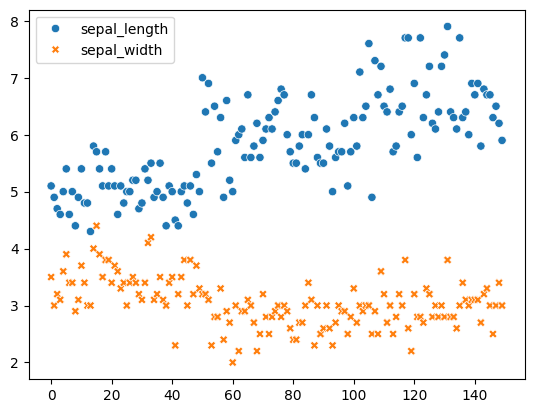

In [68]:
# see how it is plotted
sns.scatterplot(df)

In [69]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,12):
  model=KMeans(n_clusters=i)
  model.fit_predict(df)
  wcss.append(model.inertia_)



In [70]:
wcss

[57.98240604207882,
 37.14117220801367,
 27.95870982492086,
 24.019751984126984,
 18.379813559211392,
 16.693693732193736,
 13.197206221198154,
 11.157908404558405,
 10.86983111577965,
 8.700902825244928]

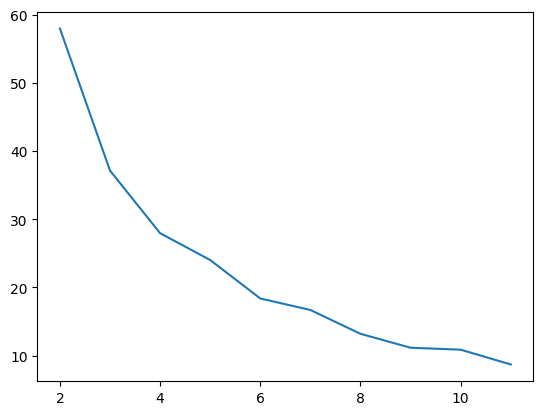

In [94]:
plt.plot(range(2,12),wcss)

In [145]:
X=df.iloc[:,:].values
km=KMeans(n_clusters=6)

In [146]:
y_means=km.fit_predict(X)

In [147]:
X[y_means==0]

array([[5.4, 3.9],
       [5.4, 3.7],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.7, 3.8],
       [5.2, 4.1],
       [5.5, 4.2]])

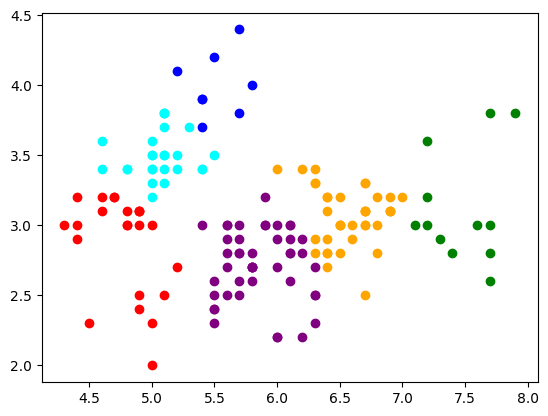

In [148]:
color = ['blue', 'purple', 'red', 'green', 'orange', 'cyan', 'magenta', 'brown', 'violet', 'gold']
for i in range(0,10):
  plt.scatter(x=X[y_means==i,0],y=X[y_means==i,1],color=color[i])






In [149]:
# hierrarical clustering
import scipy.cluster.hierarchy as shc

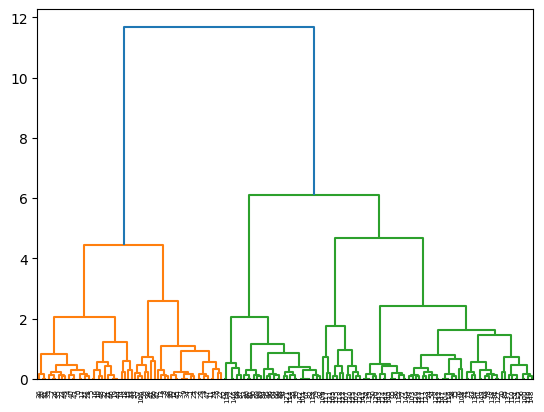

In [151]:
dend=shc.dendrogram(shc.linkage(df,method='ward'))

In [152]:
from sklearn.cluster import AgglomerativeClustering

In [156]:
cluster = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='ward')

In [158]:
y_means=cluster.fit_predict(df)

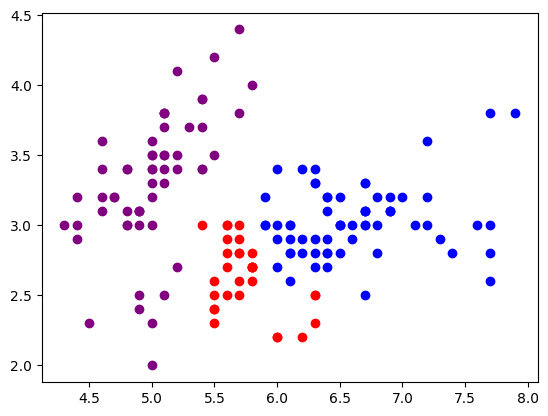

In [159]:
color = ['blue', 'purple', 'red', 'green', 'orange', 'cyan', 'magenta', 'brown', 'violet', 'gold']
for i in range(0,10):
  plt.scatter(x=X[y_means==i,0],y=X[y_means==i,1],color=color[i])